## Tannis McCartney
## May 27, 2022

### This notebook completes visualizations on the orders-products-customers dataframe.

## Contents:
### 01 Import libraries
### 02 Import data
### 03 Create sample of data
### 04 Compare age and number of dependents in line chart
### 05 Compare age and spending power in a scatterplot

# 01 Import libraries

In [1]:
# Import libraries for analysis and visualization
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import data

In [2]:
# Turn project folder path into a string
path = r'C:\Users\tmmcc\Google Drive\Data Analytics Bootcamp\4 Python Fundamentals for Data Analysts\05-2022 Instacart Basket Analysis'

In [3]:
# Import merged orders, products and customer data
df_ords_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))
df_ords_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,mean_prices,spending_flag,median_days_since_order,order_frequency,state,age,date_joined,dependants,household_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,6.37,Low spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,6.37,Low spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,6.37,Low spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,6.37,Low spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,6.37,Low spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423


In [4]:
# Check shape of dataframe
df_ords_cust_merge.shape

(32433030, 30)

# 03 Create a sample of the dataframe

In [5]:
# Create the random samples
np.random.seed(4)

In [6]:
# Create a boolean test for np.random.rand() 
dev = np.random.rand(len(df_ords_cust_merge)) <= 0.7
dev

array([False,  True, False, ...,  True, False,  True])

In [7]:
# Store 30% of samples in small dataframe
small = df_ords_cust_merge[~dev]

In [8]:
small.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,mean_prices,spending_flag,median_days_since_order,order_frequency,state,age,date_joined,dependants,household_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,6.37,Low spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,6.37,Low spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,6.37,Low spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423
6,550135,1,7,1,9,20.0,False,196,1,1,...,6.37,Low spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423
10,2539329,1,1,2,8,NaN,True,14084,2,0,...,6.37,Low spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423


In [9]:
# Check length of small compared to length of original dataframe
len(small)/len(df_ords_cust_merge)

0.29998387446377967

#### The length of small is 30% of the length of df_ords_cust_merge

# 04 Compare age and number of dependents in line chart

In [10]:
# Reduce samples to only columns needed for the chart (to speed up)
df_2 = small[['age', 'dependants']]
df_2.tail(10)

,age,dependants
32432997,38,1
32433002,25,0
32433005,25,0
32433007,25,0
32433008,25,0
32433009,25,0
32433015,25,0
32433018,25,0
32433020,25,0
32433028,22,3


[Text(0.5, 1.0, 'Number of dependants vs Age'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Number of Dependants')]

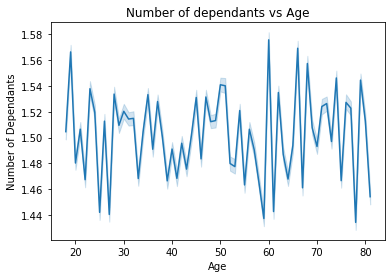

In [11]:
# Create line chart of small dataframe
line = sns.lineplot(
    data = df_2,
    x = 'age',
    y = 'dependants')
line.set(title= "Number of dependants vs Age", xlabel="Age", ylabel="Number of Dependants")

#### The line chart does not appear to show any correlation between age and number of dependents. There is no discernable relationship between the two.

In [12]:
# Export line object created previously
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '08-line_age_dependants.png'))

# 05 Compare age and spending power in a scatterplot

[Text(0.5, 1.0, 'Spending Power by Age'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Income (dollars)')]

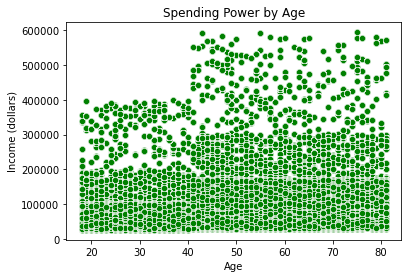

In [13]:
# Create a scatterplot of the "prices" column
scatter = sns.scatterplot(
    x = 'age',
    y = 'income',
    data = df_ords_cust_merge, 
    color=['green'])
scatter.set(title="Spending Power by Age", xlabel="Age", ylabel="Income (dollars)")

#### Customers under 40 have incomes les than 400,000. Fewer customers under 40 have incomes between 200,000 and 400,000 than customers over 40. In other words, customers over 40 have greater spending power.

In [15]:
# Export scatter object
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '09-scatter_age_income.png'), bbox_inches='tight')